In [13]:
#Linear regression

import pandas as pd
import numpy as np
import os
from sklearn.metrics import mean_squared_error
from IPython.display import clear_output
from sklearn.preprocessing import StandardScaler



In [5]:
%matplotlib inline

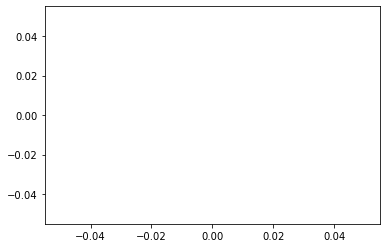

In [6]:
import matplotlib.pyplot as plt

hl, = plt.plot([], [])

def update_line(hl, xdata,ydata):
    hl.set_xdata(np.append(hl.get_xdata(), xdata))
    hl.set_ydata(np.append(hl.get_ydata(), ydata))
    plt.draw()
    plt.pause(0.05)

In [7]:
# Load the data
data = np.loadtxt("airfoil_self_noise.dat")

x = data[:,:5]
y = data[:,5]


In [8]:
sc  = StandardScaler()
x = sc.fit_transform(x)

x = np.concatenate((np.ones((len(x),1)),x),axis=1)


In [9]:
parms = np.array([.5]* 6)
parms

lr = .01


In [10]:
def get_loss(parms):
	yhat =  np.matmul(x,parms.T)
	mse = mean_squared_error(y,yhat)
	return mse


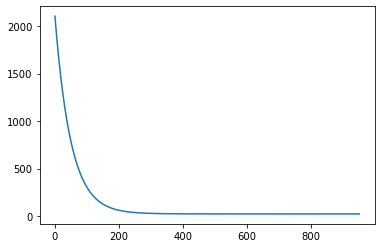

In [12]:
j_ = []
loss_= []
for j in range(1000):
    p = np.zeros(6)
    for i in range(6):
        a= (np.matmul(x,parms) - y)
        p[i] = (lr/1503)*np.sum(a*x[:,i])

    loss = get_loss(parms)
    parms = parms - p
    j_.append(j)
    loss_.append(loss)
    
    if j%50 ==0:
        clear_output(wait=True)
        plt.plot(j_,loss_)
        plt.pause(0.05)

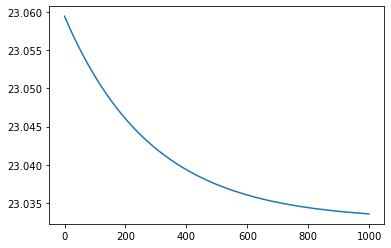

In [70]:
plt.plot(j_,loss_)